In [1]:
# Special matplotlib import for the Jupyter notebook
%matplotlib inline
from IPython.display import IFrame

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import glob
import h5py

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import model_from_json
from evolutron.networks import custom_layers
from evolutron.engine import DeepTrainer

Using Theano backend.


In [3]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
def set_size(fig):
    fig.set_size_inches(6, 3)
    plt.tight_layout()

In [4]:
def plot_loss_acc(train_loss, train_acc, valid_loss, valid_acc):
    fig, ax = plt.subplots(1, 2)
    
    ax[0].plot(train_loss, label='Training Set')
    ax[0].plot(valid_loss, label='Test Set')
    
    ax[1].plot(train_acc, label='Training Set')
    ax[1].plot(valid_acc, label='Test Set')
    
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Negative Log Loss")
    
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Categorical Accuracy")
    
    ax[0].spines['right'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='lower right')
    return fig, ax

In [25]:
dataset='crispr'
models = glob.glob('models/'+dataset+'/*.model')
histories = glob.glob('models/'+dataset+'/*.history.npz')

In [ ]:
for m in models:
    print(m)
    hf = h5py.File(m)
    net = DeepTrainer(model_from_json(hf.attrs['model_config'].decode('utf8'), custom_objects=custom_layers))
    net.display_network_info()
    hf.close()

In [30]:
for h in histories:
    with np.load(h) as f:
        print(h)
        try:
            print(f['train_acc'][-1])
        except :
            print(f['mean_cat_acc'][-1])

models/crispr/100_10_10_3_1_DeepCoFAM.history.npz
0.71433447099
models/crispr/100_10_37_3_1_DeepCoFAM.history.npz
0.711774744027
models/crispr/200_30_100_1_1_realDeepCoDER.history.npz
0.885251759379
models/crispr/200_30_104_1_None_DeepCoFAM.history.npz
0.723378843008
models/crispr/200_30_117_1_1_DeepCoFAM.history.npz
0.713139931741
models/crispr/50_10_160_1_2_DeepCoFAM.history.npz
0.698976109215


In [31]:
h = 'models/crispr/200_30_104_1_None_DeepCoFAM.history.npz'
with np.load(h) as f:
    print(f.files)
    train_loss = f['loss']
#     train_loss = f['train_loss']
    train_acc = f['mean_cat_acc']
#     train_acc = f['train_acc']
    valid_loss = f['val_loss']
    valid_acc = f['val_mean_cat_acc']
#     valid_acc = f['val_acc_mem']

['mean_cat_acc', 'val_mean_cat_acc', 'val_loss', 'lr', 'loss']


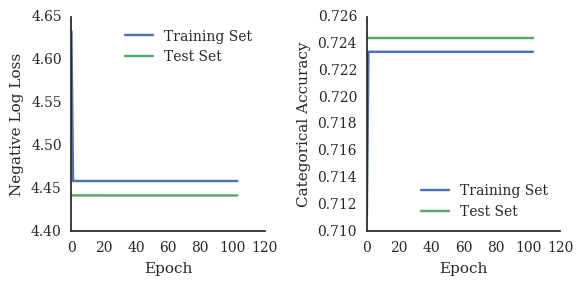

In [32]:
set_style()
fig, axes = plot_loss_acc(train_loss, train_acc, valid_loss, valid_acc)
set_size(fig)
plt.savefig('show/figures/{}_val_loss_acc_cofam.pdf'.format(dataset), dpi=300)